# ***IMPORT LIBRARIES***

In [57]:
pwd

'/home/wsuser/work'

In [58]:
ls

CNNengine.h5  Dataset/  trainedModel.tgz


In [59]:

import os, types
import pandas as pd
from botocore.client import Config
import ibm_boto3

def __iter__(self): return 0

# @hidden_cell
# The following code accesses a file in your IBM Cloud Object Storage. It includes your credentials.
# You might want to remove those credentials before you share the notebook.
cos_client = ibm_boto3.client(service_name='s3',
    ibm_api_key_id='nK4KtDgHAyMI9PkCaS6J_L_ERjoB39nSYRduTKKVkGKY',
    ibm_auth_endpoint="https://iam.cloud.ibm.com/oidc/token",
    config=Config(signature_version='oauth'),
    endpoint_url='https://s3.private.us.cloud-object-storage.appdomain.cloud')

bucket = 'realtimecommunication-donotdelete-pr-nlyywsuyz66pqq'
object_key = 'conversation engine for deaf and dumb.zip'

streaming_body_1 = cos_client.get_object(Bucket=bucket, Key=object_key)['Body']

# Your data file was loaded into a botocore.response.StreamingBody object.
# Please read the documentation of ibm_boto3 and pandas to learn more about the possibilities to load the data.
# ibm_boto3 documentation: https://ibm.github.io/ibm-cos-sdk-python/
# pandas documentation: http://pandas.pydata.org/


In [60]:
ls

CNNengine.h5  Dataset/  trainedModel.tgz


In [61]:
from io import BytesIO
import zipfile
unzip=zipfile.ZipFile(BytesIO(streaming_body_1.read()),'r')
file_paths=unzip.namelist()
for path in file_paths:
    unzip.extract(path)

In [62]:
ls

CNNengine.h5  Dataset/  trainedModel.tgz


In [63]:
pwd

'/home/wsuser/work'

In [64]:
!pip install tensorflow==2.7.1

     |████████████████████████████████| 1.3 MB 8.7 MB/s eta 0:00:01
  Attempting uninstall: keras
    Found existing installation: Keras 2.2.4
    Uninstalling Keras-2.2.4:
      Successfully uninstalled Keras-2.2.4


In [65]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [66]:
train_datagen = ImageDataGenerator(rescale=1/255,zoom_range=0.2,horizontal_flip=True,vertical_flip=False)

In [67]:
test_datagen = ImageDataGenerator(rescale=1/255)

In [68]:
ls

CNNengine.h5  Dataset/  trainedModel.tgz


In [69]:
pwd

'/home/wsuser/work'

In [70]:
x_train = train_datagen.flow_from_directory("/home/wsuser/work/Dataset/training_set", target_size=(64,64),batch_size=100,
                                            class_mode='categorical', color_mode ="grayscale")

Found 15750 images belonging to 9 classes.


In [71]:
x_test = test_datagen.flow_from_directory("/home/wsuser/work/Dataset/test_set", target_size=(64,64),batch_size=100,
                                         class_mode='categorical', color_mode ="grayscale")

Found 2250 images belonging to 9 classes.


In [72]:
len(x_train)

158

In [73]:
len(x_test)

23

In [74]:
x_train.class_indices

{'A': 0, 'B': 1, 'C': 2, 'D': 3, 'E': 4, 'F': 5, 'G': 6, 'H': 7, 'I': 8}

## ***MODEL BUILDING***

In [75]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Convolution2D
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from keras.layers import Dropout
from keras.layers import Flatten

In [76]:
#Creating the model
model=Sequential()
#Adding the layers
model.add(Convolution2D(32,(3,3), input_shape=(64,64,1), activation = 'relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())

#adding hidden layers
model.add(Dense(400, activation='relu'))
model.add(Dense(200, activation='relu'))
model.add(Dense(100, activation='relu'))

#Adding the output layer
model.add(Dense(9, activation='softmax'))

In [77]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [78]:
model.fit_generator(x_train, steps_per_epoch=30, epochs=10, validation_data=x_test,validation_steps=50)

/tmp/wsuser/ipykernel_164/43643550.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  model.fit_generator(x_train, steps_per_epoch=30, epochs=10, validation_data=x_test,validation_steps=50)


Epoch 1/10
30/30 [==============================] - 15s 492ms/step - loss: 0.9823 - accuracy: 0.6644 - val_loss: 0.4462 - val_accuracy: 0.8827
Epoch 2/10
30/30 [==============================] - 12s 383ms/step - loss: 0.2524 - accuracy: 0.9223
Epoch 3/10
30/30 [==============================] - 12s 390ms/step - loss: 0.1426 - accuracy: 0.9560
Epoch 4/10
30/30 [==============================] - 12s 410ms/step - loss: 0.1030 - accuracy: 0.9710
Epoch 5/10
30/30 [==============================] - 15s 490ms/step - loss: 0.0759 - accuracy: 0.9803
Epoch 6/10
30/30 [==============================] - 12s 397ms/step - loss: 0.0507 - accuracy: 0.9857
Epoch 7/10
30/30 [==============================] - 12s 393ms/step - loss: 0.0359 - accuracy: 0.9890
Epoch 8/10
30/30 [==============================] - 12s 400ms/step - loss: 0.0301 - accuracy: 0.9922
Epoch 9/10
30/30 [==============================] - 12s 399ms/step - loss: 0.0320 - accuracy: 0.9897
Epoch 10/10
30/30 [==============================

# ***Save the Model***

In [79]:
ls

CNNengine.h5  Dataset/  trainedModel.tgz


In [80]:
model.save('CNNengine.h5')

In [81]:
ls

CNNengine.h5  Dataset/  trainedModel.tgz


# ***Import The Packages And Load The Saved Model***

In [82]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
import numpy as np
import cv2

In [83]:
model = load_model('CNNengine.h5')

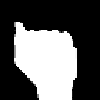

In [84]:
img = image.load_img('/home/wsuser/work/Dataset/test_set/A/1.png',target_size = (100,100))
img

# ***Load The Test Image, Pre-Process It And Predict***

In [85]:
from skimage.transform import resize
def detect(frame):
    img=image.img_to_array(frame)
    img = resize(img,(64,64,1))
    img = np.expand_dims(img,axis=0)
    pred=np.argmax(model.predict(img))
    op=['A','B','C','D','E','F','G','H','I']
    print("THE PREDICTED LETTER IS ",op[pred])

In [86]:
img=image.load_img("/home/wsuser/work/Dataset/test_set/A/1.png")
detect(img)

THE PREDICTED LETTER IS  A


In [87]:
img = image.load_img('/home/wsuser/work/Dataset/test_set/I/109.png')
pred=detect(img)

THE PREDICTED LETTER IS  I


# IBM Deployment

In [88]:
!tar -zcvf trainedModel.tgz CNNengine.h5

CNNengine.h5


In [89]:
import tensorflow as tf
tf.__version__

'2.7.2'

In [90]:
!pip install keras==2.2.4

  Using cached Keras-2.2.4-py2.py3-none-any.whl (312 kB)
  Attempting uninstall: keras
    Found existing installation: keras 2.7.0
    Uninstalling keras-2.7.0:
      Successfully uninstalled keras-2.7.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow 2.7.1 requires keras<2.8,>=2.7.0rc0, but you have keras 2.2.4 which is incompatible.


In [91]:
!pip install watson-machine-learning-client

In [92]:
from ibm_watson_machine_learning import APIClient
wml_credentials={
    "url":"https://us-south.ml.cloud.ibm.com",
    "apikey":"e2ka0MNDZZs-Y2_3hvue8au0bmWfwOZtqRJh8mEqiEp5"
}
client=APIClient(wml_credentials)

In [93]:
client

In [95]:
def guid_from_space_name(client, specially_abled):
    space = client.spaces.get_details()
    return (next(item for item in space['resources'] if item['entity']["name"] == specially_abled)['metadata']['id'])

In [96]:
space_uid = guid_from_space_name(client, 'specially_abled')
print("Space UID : ", space_uid)

Space UID :  39fb543f-0587-4283-8979-a4987fb5f904


In [97]:
client.set.default_space(space_uid)

'SUCCESS'

In [98]:
client.software_specifications.list()

-----------------------------  ------------------------------------  ----
NAME                           ASSET_ID                              TYPE
default_py3.6                  0062b8c9-8b7d-44a0-a9b9-46c416adcbd9  base
kernel-spark3.2-scala2.12      020d69ce-7ac1-5e68-ac1a-31189867356a  base
pytorch-onnx_1.3-py3.7-edt     069ea134-3346-5748-b513-49120e15d288  base
scikit-learn_0.20-py3.6        09c5a1d0-9c1e-4473-a344-eb7b665ff687  base
spark-mllib_3.0-scala_2.12     09f4cff0-90a7-5899-b9ed-1ef348aebdee  base
pytorch-onnx_rt22.1-py3.9      0b848dd4-e681-5599-be41-b5f6fccc6471  base
ai-function_0.1-py3.6          0cdb0f1e-5376-4f4d-92dd-da3b69aa9bda  base
shiny-r3.6                     0e6e79df-875e-4f24-8ae9-62dcc2148306  base
tensorflow_2.4-py3.7-horovod   1092590a-307d-563d-9b62-4eb7d64b3f22  base
pytorch_1.1-py3.6              10ac12d6-6b30-4ccd-8392-3e922c096a92  base
tensorflow_1.15-py3.6-ddl      111e41b3-de2d-5422-a4d6-bf776828c4b7  base
autoai-kb_rt22.2-py3.10        125b6d9

In [99]:
software_space_uid=client.software_specifications.get_uid_by_name('tensorflow_rt22.1-py3.9')

In [100]:
software_space_uid

'acd9c798-6974-5d2f-a657-ce06e986df4d'

In [ ]:
model_details = client.repository.store_model(model='trainedModel.tgz', meta_props={
    client.repository.ModelMetaNames.NAME: "CNNengine.h5",
    client.repository.ModelMetaNames.SOFTWARE_SPEC_UID:software_space_uid,
    client.repository.ModelMetaNames.TYPE: "tensorflow_2.7"})
model_id = client.repository.get_model_id(model_details)

In [114]:
model_id=client.repository.get_model_id(model_details)

In [115]:
model_id

'dd161c21-858d-464f-9dbd-51118f73670c'

In [116]:
client.repository.download(model_id,'IBM.tar.gb')

Successfully saved model content to file: 'IBM.tar.gb'


'/home/wsuser/work/IBM.tar.gb'

In [117]:
pwd

'/home/wsuser/work'

In [118]:
ls

CNNengine.h5  Dataset/  IBM.tar.gb  trainedModel.tgz
